In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def convoy(t,Z, N, b, c, T, v_f):
    A = np.array([[0, 1], [-c, -b]])
    B = np.array([[0, 0], [c, b - c * T]])
    M = np.zeros((2 * N, 2 * N))
    for i in range(N - 1):
        M[2 * i:2 * i + 2, 2 * i:2 * i + 2] = A
        M[2 * i:2 * i + 2, 2 * i + 2:2 * i + 4] = B
    M[2 * (N - 1):2 * N, 2 * (N - 1):2 * N] = A
    F = np.zeros(2 * N)
    F[2 * (N-1) + 1] = c * T * v_f
    return M.dot(Z) + F

def simulate_convoy(N, b, c=3.0, T=1.0, t_end=60):
    initial_spacing = 30
    initial_velocity = 20
    v_f = initial_velocity
    Z0 = np.zeros(2 * N)
    Z0[0::2] = initial_spacing * np.ones(N)
    Z0[1::2] = initial_velocity - np.zeros(N)

    solution = solve_ivp(convoy, [0, t_end], Z0, args=(N, b, c, T, v_f), dense_output=True)
    t = np.linspace(0, t_end, 300)
    Z = solution.sol(t)
    return t, Z


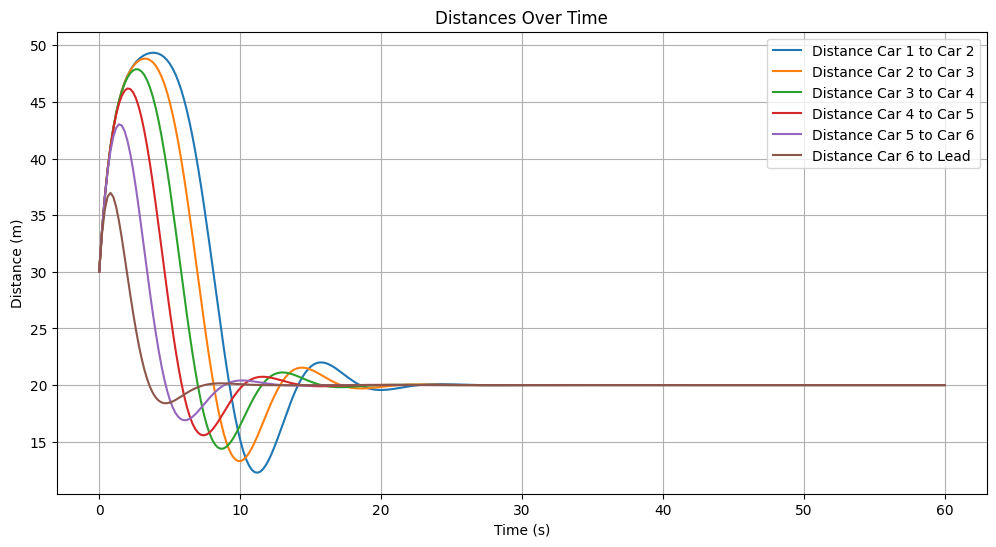

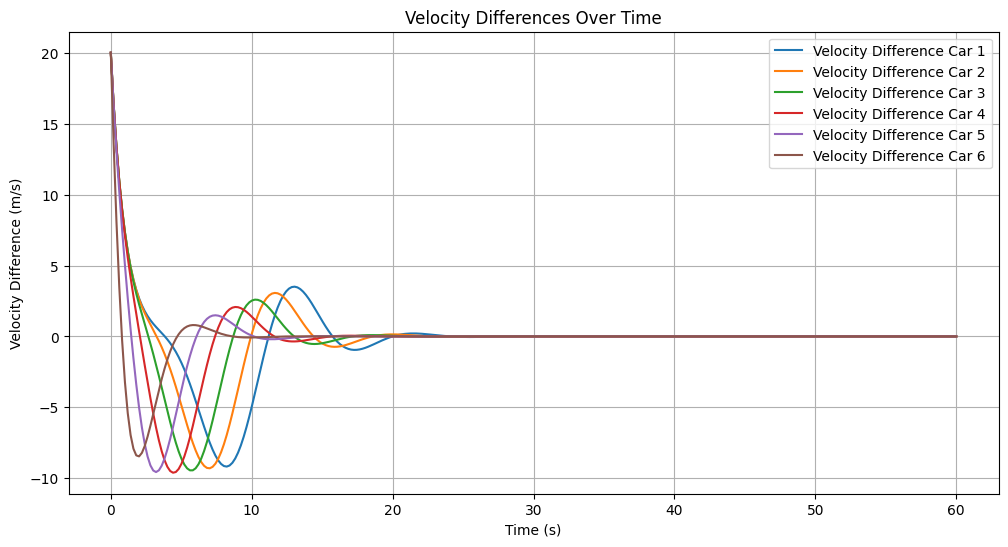

In [68]:
# Parameters for simulation
N = 6
b = 1.2
c = 1.0
T = 1.0
t_end = 60

# Run the simulation
t, Z = simulate_convoy(N, b, c, T, t_end)

# Plotting the results for distances
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, Z[2*i], label=f'Distance Car {i+1} to Car {i+2}' if i < N-1 else f'Distance Car {i+1} to Lead')
plt.title('Distances Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the results for velocity differences
plt.figure(figsize=(12, 6))
for i in range(N):
    plt.plot(t, Z[2*i+1], label=f'Velocity Difference Car {i+1}')
plt.title('Velocity Differences Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Velocity Difference (m/s)')
plt.legend()
plt.grid(True)
plt.show()

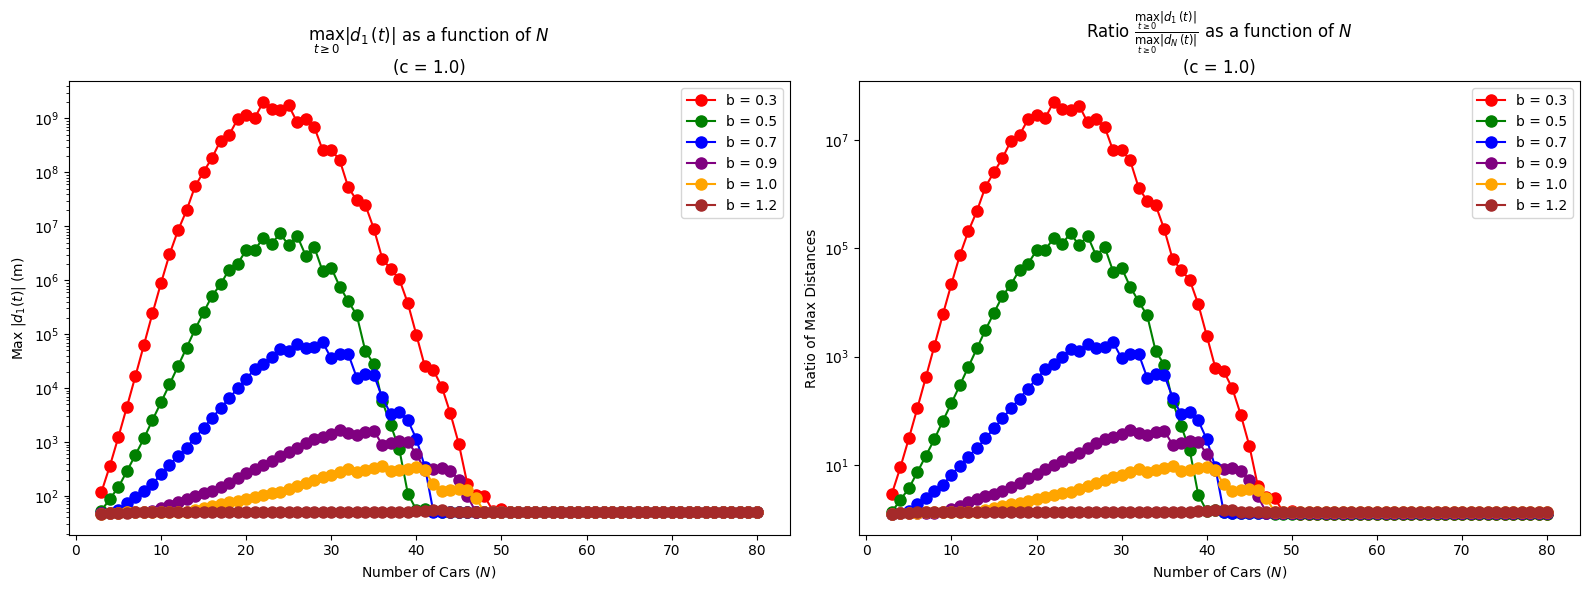

In [69]:
N_range = range(3, 81)  # Range of N values
b_values = [0.3, 0.5, 0.7, 0.9, 1.0, 1.2]  # Different values of b to plot

# Create the plots
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
for b, color in zip(b_values, colors):
    max_d1_values = []
    max_dN_values = []
    for N in N_range:
        t, Z = simulate_convoy(N, b, c, T, t_end)
        max_d1 = np.max(np.abs(Z[0]))
        max_dN = np.max(np.abs(Z[2 * (N - 1)]))
        max_d1_values.append(max_d1)
        max_dN_values.append(max_dN)

    ratio = np.array(max_d1_values) / np.array(max_dN_values)

    # Plot max |d1(t)| for each b
    ax2.plot(list(N_range), max_d1_values, marker='o', linestyle='-', color=color, markersize=8, label=f'b = {b}')
    ax2.set_yscale('log')  # Set logarithmic scale
    
    # Plot the ratio for each b
    ax1.plot(list(N_range), ratio, marker='o', linestyle='-', color=color, markersize=8, label=f'b = {b}')
    ax1.set_yscale('log')  # Set logarithmic scale

# Setting titles and labels for ax2
ax2.set_title(r'$\max_{t \geq 0} |d_1(t)|$ as a function of $N$' + f'\n(c = {c})')
ax2.set_xlabel('Number of Cars ($N$)')
ax2.set_ylabel('Max $|d_1(t)|$ (m)')
ax2.legend()

# Setting titles and labels for ax1
ax1.set_title(r'Ratio $\frac{\max_{t \geq 0} |d_1(t)|}{\max_{t \geq 0} |d_N(t)|}$ as a function of $N$' + f'\n(c = {c})')
ax1.set_xlabel('Number of Cars ($N$)')
ax1.set_ylabel('Ratio of Max Distances')
ax1.legend()

plt.tight_layout()
plt.show()


In [ ]:
N_range = range(3, 81)  # Range of N values
b_values = np.linspace(0, 1.2, 13)  # Increment by 0.1 to cover 0 to 1.2

Ns = []
max_max_d1 = []
for b in b_values:
    highest_d1 = 0
    best_N = 0
    max_d1_values = []
    max_dN_values = []
    for N in N_range:
        t, Z = simulate_convoy(N, b, c, T, t_end)
        max_d1 = np.max(np.abs(Z[0]))
        max_dN = np.max(np.abs(Z[2 * (N - 1)]))
        max_d1_values.append(max_d1)
        max_dN_values.append(max_dN)
        if max_d1 > highest_d1:
            highest_d1 = max_d1
            best_N = N
    print(f'For b = {b}, the best N is {best_N} with max d1 = {highest_d1}')
    Ns.append(best_N)
    max_max_d1.append(highest_d1)

print(b_values, Ns)
plt.plot(Ns, Ns, marker='o', linestyle='-', color='blue', markersize=8)
plt.xlabel('b')
plt.ylabel('N')
plt.title('N where max d_1 is the highest as a function of b')



For b = 0.0, the best N is 28 with max d1 = 88863951392708.12
For b = 0.09999999999999999, the best N is 24 with max d1 = 1761145153660.1272
For b = 0.19999999999999998, the best N is 24 with max d1 = 52035409592.23312
For b = 0.3, the best N is 22 with max d1 = 2014872279.4840198


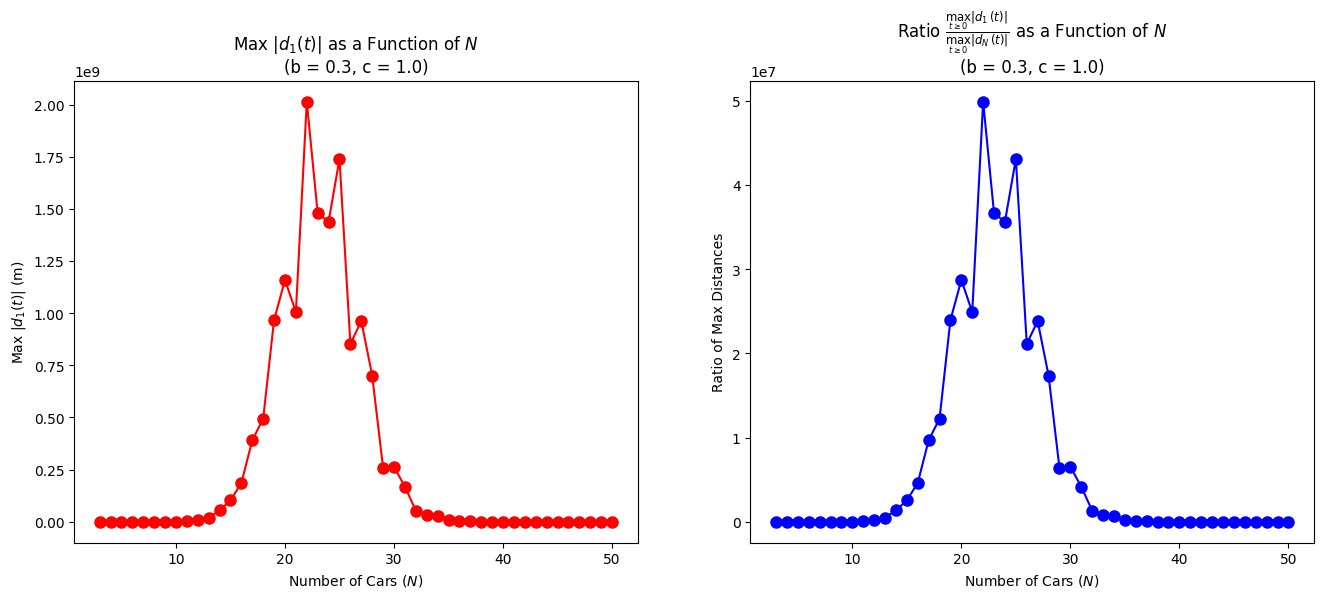

In [60]:
N_range = range(3, 51)  
b=0.3
max_d1_values = []
max_dN_values = []
for N in N_range:
    t, Z = simulate_convoy(N, b, c, T, t_end)
    max_d1 = np.max(np.abs(Z[0]))
    max_dN = np.max(np.abs(Z[2*(N-1)])) 
    max_d1_values.append(max_d1)
    max_dN_values.append(max_dN)



ratio = np.array(max_d1_values) / np.array(max_dN_values)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(16, 6)) 

ax1.plot(list(N_range), ratio, marker='o', linestyle='-', color='blue', markersize=8)
ax1.set_title(r'Ratio $\frac{\max_{t \geq 0} |d_1(t)|}{\max_{t \geq 0} |d_N(t)|}$ as a Function of $N$' + f'\n(b = {b}, c = {c})')

ax1.set_xlabel('Number of Cars ($N$)')
ax1.set_ylabel('Ratio of Max Distances')

ax2.plot(list(N_range), max_d1_values, marker='o', linestyle='-', color='red', markersize=8)
ax2.set_title(f'Max $|d_1(t)|$ as a Function of $N$\n(b = {b}, c = {c})')
ax2.set_xlabel('Number of Cars ($N$)')
ax2.set_ylabel('Max $|d_1(t)|$ (m)')


plt.show()


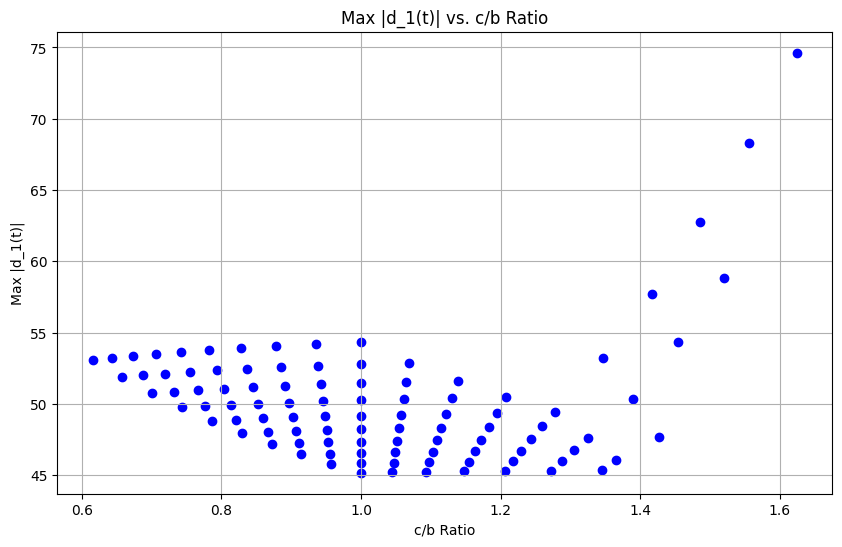

In [50]:

def analyze_break_point():
    # Range of b and c values
    b_values = np.linspace(0.8, 1.3, 10)
    c_values = np.linspace(0.8, 1.3, 10)
    N = 6  # Assuming a convoy size of 6
    T = 1.0
    t_end = 60

    results = []
    for b in b_values:
        for c in c_values:
            t, Z = simulate_convoy(N, b, c, T, t_end)
            max_d1 = np.max(np.abs(Z[0]))  # Extract the maximum of |d1(t)|
            results.append((b, c, max_d1))

    # Organizing the results
    results = np.array(results)
    # Sorting results by b/c ratio to identify the transition
    ratios = results[:, 1] / results[:, 0]
    sorted_indices = np.argsort(ratios)
    sorted_results = results[sorted_indices]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(sorted_results[:, 1] / sorted_results[:, 0], sorted_results[:, 2], c='blue', marker='o')
    plt.title('Max |d_1(t)| vs. c/b Ratio')
    plt.xlabel('c/b Ratio')
    plt.ylabel('Max |d_1(t)|')
    plt.grid(True)
    plt.show()

    return sorted_results

# Call the analysis function
sorted_results = analyze_break_point()
